# Payoff d'options vanille (call / put) sur SPY

Ce notebook constitue un support de TP : il documente, pas à pas, le calcul du payoff d'une option européenne vanille (call et put) sur SPY.

Objectifs pédagogiques :
1. Récupérer un historique de clôtures quotidiennes sur un an pour le sous-jacent (SPY) afin de visualiser le contexte de marché.
2. Définir un spot de référence (dernier cours de clôture) et illustrer la forme théorique du payoff call/put en fonction du strike.
3. Mettre en œuvre les formules standards de payoff utilisées dans nos scripts de pricing, pour relier théorie et pratique.

In [5]:
%pip -q install yfinance matplotlib pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use("seaborn-v0_8-darkgrid")

# Payoff européens (mêmes formules que dans l'app : compute_option_payoff pour vanilla)
def payoff_call(spot: float, strike: float) -> float:
    return max(spot - strike, 0.0)

def payoff_put(spot: float, strike: float) -> float:
    return max(strike - spot, 0.0)

def fetch_spy_history(period="1y", interval="1d") -> pd.Series:
    """Récupère les prix de clôture SPY sur 1 an (source CBOE via ticker SPY, fallback yfinance)."""
    data = yf.download("SPY", period=period, interval=interval, progress=False)
    if data.empty or "Close" not in data:
        raise RuntimeError("Impossible de récupérer les prix SPY")
    return data["Close"]

# Récupération des prix de clôture
close_spy = fetch_spy_history()
spot_ref = float(close_spy.iloc[-1])
spot_ref

C:\Users\nicol\AppData\Local\Temp\ipykernel_9908\3844225470.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("SPY", period=period, interval=interval, progress=False)
C:\Users\nicol\AppData\Local\Temp\ipykernel_9908\3844225470.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spot_ref = float(close_spy.iloc[-1])


679.6799926757812

## Évolution du sous-jacent (SPY)
Visualisation de l'évolution du sous-jacent sur un an : cet historique motive le choix d'un spot de référence (dernier close) pour les exercices de payoff.

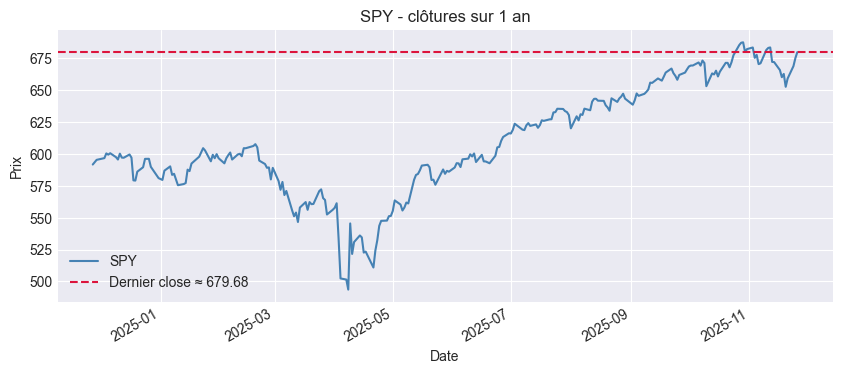

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
close_spy.plot(ax=ax, color="steelblue", label="SPY close")
ax.axhline(spot_ref, color="crimson", linestyle="--", label=f"Dernier close ≈ {spot_ref:.2f}")
ax.set_title("SPY - clôtures sur 1 an")
ax.set_xlabel("Date")
ax.set_ylabel("Prix")
ax.legend()
plt.show()

## Courbes de payoff call / put

Représentation des payoffs théoriques (call et put européens) en fonction du strike, pour un spot fixé au dernier close (`spot_ref`). Le but est de relier la formule analytique à sa visualisation graphique, comme dans l’interface de pricing.

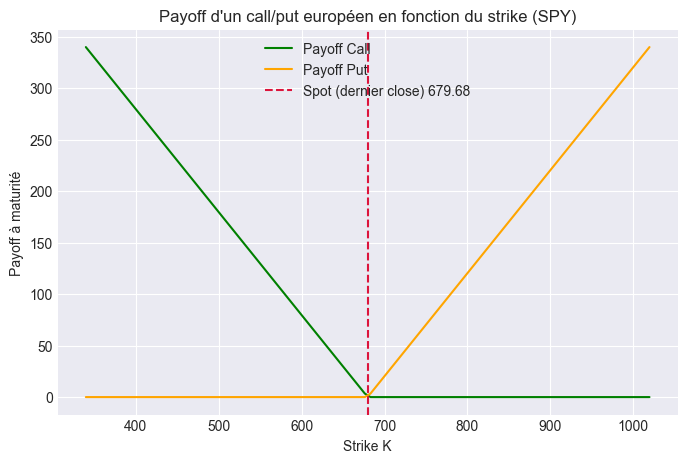

In [8]:
strikes = np.linspace(spot_ref * 0.5, spot_ref * 1.5, 100)
call_payoffs = [payoff_call(spot_ref, k) for k in strikes]
put_payoffs = [payoff_put(spot_ref, k) for k in strikes]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(strikes, call_payoffs, label="Payoff Call", color="green")
ax.plot(strikes, put_payoffs, label="Payoff Put", color="orange")
ax.axvline(spot_ref, color="crimson", linestyle="--", label=f"Spot (dernier close) {spot_ref:.2f}")
ax.set_xlabel("Strike K")
ax.set_ylabel("Payoff à maturité")
ax.set_title("Payoff d'un call/put européen en fonction du strike (SPY)")
ax.legend()
plt.show()

In [10]:
import ipywidgets as widgets
from IPython.display import display, Markdown

spot_slider = widgets.FloatSlider(value=spot_ref, min=spot_ref*0.5, max=spot_ref*1.5, step=1.0, description='Spot_exp')
strike_slider = widgets.FloatSlider(value=spot_ref, min=spot_ref*0.5, max=spot_ref*1.5, step=1.0, description='Strike')

output = widgets.Output()

def _update_payoff(change=None):
    with output:
        output.clear_output()
        S_T = spot_slider.value
        K = strike_slider.value
        call_p = payoff_call(S_T, K)
        put_p = payoff_put(S_T, K)
        display(Markdown(f"**S_T = {S_T:.2f}, K = {K:.2f}**\n\n- Payoff call = {call_p:.4f}\n- Payoff put = {put_p:.4f}"))

_update_payoff()
spot_slider.observe(_update_payoff, names='value')
strike_slider.observe(_update_payoff, names='value')

widgets.VBox([spot_slider, strike_slider, output])

